In [3]:
#Importing Liabraries
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder, StandardScaler

import matplotlib.pyplot as plt # data visualization
import seaborn as sns # statistical data visualization

import warnings
warnings.filterwarnings('ignore')

In [4]:
#Load the dataset
dataset = pd.read_csv('bank_with_missing.csv')

In [5]:
#Display first 5 rows of dataset
dataset.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58.0,management,married,tertiary,no,2143.0,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44.0,technician,single,secondary,no,29.0,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33.0,entrepreneur,married,secondary,no,2.0,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47.0,blue-collar,married,unknown,no,1506.0,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,NaN,unknown,single,unknown,no,1.0,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [6]:
#Display last 5 records of dataset
dataset.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
45206,51.0,technician,married,tertiary,no,825.0,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71.0,retired,divorced,primary,no,1729.0,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72.0,retired,married,secondary,no,5715.0,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57.0,blue-collar,married,secondary,no,668.0,no,no,telephone,17,nov,508,4,-1,0,unknown,no
45210,37.0,entrepreneur,married,secondary,no,2971.0,no,no,cellular,17,nov,361,2,188,11,other,no


In [7]:
#Rows and columns of dataset
dataset.shape

(45211, 17)

In [8]:
#Shows the number of null values in each column
dataset.isna().sum()

age          100
job          120
marital        0
education      0
default        0
balance       80
housing        0
loan           0
contact        0
day            0
month          0
duration       0
campaign       0
pdays          0
previous       0
poutcome       0
y              0
dtype: int64

In [9]:
#Age, job and balance has 100, 120 and 80 NA values

In [10]:
#Calculating the mean of age data
age_mean = dataset['age'].mean()

In [11]:
age_mean

np.float64(40.937398860588324)

In [12]:
#Calculating the mode of job data
#blue-collar job has highest frequency
job_mode = dataset['job'].mode()

In [13]:
job_mode

0    blue-collar
Name: job, dtype: object

In [14]:
#Fills all N/A values in age with the mean
dataset['age'].fillna(age_mean, inplace=True)

In [15]:
#Fills all N/A values in job with 'blue-collar'
dataset['job'].fillna(job_mode[0], inplace=True)

In [16]:
#Dataset is cleaned
cleaned_data = dataset.dropna()

In [17]:
#Only balance column has 80 null values
dataset.isna().sum()

age           0
job           0
marital       0
education     0
default       0
balance      80
housing       0
loan          0
contact       0
day           0
month         0
duration      0
campaign      0
pdays         0
previous      0
poutcome      0
y             0
dtype: int64

In [18]:
#Dropping the balance column
dataset = dataset.dropna(subset=['balance'])

In [19]:
#Dataset is completely cleaned. It has no null values
dataset.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [20]:
#Rows and columns have changed
dataset.shape

(45131, 17)

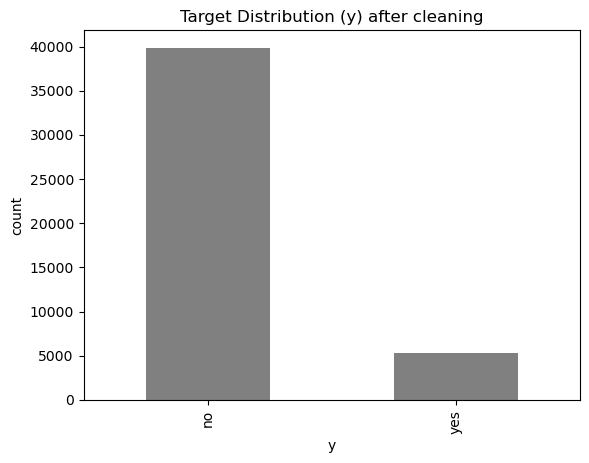

In [21]:
plt.figure()
dataset['y'].value_counts().plot(kind='bar',color='grey')
plt.title("Target Distribution (y) after cleaning")
plt.xlabel("y")
plt.ylabel("count")
plt.show()
# No is approximately 8 times larger than yes

In [22]:
#Encoding 'y' so that it turns into binary
label_encoders = {}
for column in dataset.select_dtypes(include=['object']).columns:
    if column == 'y':
        label_encoders[column] = LabelEncoder()
        dataset[column] = label_encoders[column].fit_transform(dataset[column])

In [23]:
#Checking if 'y' has changed ot not
dataset.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58.000000,management,married,tertiary,no,2143.0,yes,no,unknown,5,may,261,1,-1,0,unknown,0
1,44.000000,technician,single,secondary,no,29.0,yes,no,unknown,5,may,151,1,-1,0,unknown,0
2,33.000000,entrepreneur,married,secondary,no,2.0,yes,yes,unknown,5,may,76,1,-1,0,unknown,0
3,47.000000,blue-collar,married,unknown,no,1506.0,yes,no,unknown,5,may,92,1,-1,0,unknown,0
4,40.937399,unknown,single,unknown,no,1.0,no,no,unknown,5,may,198,1,-1,0,unknown,0


In [24]:
#Encoding all other columns to change them into binary using astype
X_raw = dataset.drop(columns=['y'])
y = dataset['y']
X = pd.get_dummies(X_raw, drop_first=True)
X = X.astype(int)

In [25]:
dataset.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58.000000,management,married,tertiary,no,2143.0,yes,no,unknown,5,may,261,1,-1,0,unknown,0
1,44.000000,technician,single,secondary,no,29.0,yes,no,unknown,5,may,151,1,-1,0,unknown,0
2,33.000000,entrepreneur,married,secondary,no,2.0,yes,yes,unknown,5,may,76,1,-1,0,unknown,0
3,47.000000,blue-collar,married,unknown,no,1506.0,yes,no,unknown,5,may,92,1,-1,0,unknown,0
4,40.937399,unknown,single,unknown,no,1.0,no,no,unknown,5,may,198,1,-1,0,unknown,0


In [26]:
#Checking the rows and columns once again
X.shape

(45131, 42)

In [27]:
#Checking if the data is imbalanced or not
dataset['y'].value_counts()

y
0    39856
1     5275
Name: count, dtype: int64

In [28]:
#All columns have changed into 0 and 1
X.head()

,age,balance,day,duration,campaign,pdays,previous,job_blue-collar,job_entrepreneur,job_housemaid,...,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown
0,58,2143,5,261,1,-1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
1,44,29,5,151,1,-1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
2,33,2,5,76,1,-1,0,0,1,0,...,0,0,0,1,0,0,0,0,0,1
3,47,1506,5,92,1,-1,0,1,0,0,...,0,0,0,1,0,0,0,0,0,1
4,40,1,5,198,1,-1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1


In [29]:
# Training and testing the model in 80/20 split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42,stratify=y)
model=LogisticRegression(max_iter=200)
model.fit(X_train,y_train)
y_pred= model.predict(X_test)

print("Train-Test Split Results:")

Train-Test Split Results:


In [30]:
# Checking X test and train
X_train.shape , X_test.shape

((36104, 42), (9027, 42))

In [31]:
# Checking y test and train
y_train.shape , y_test.shape

((36104,), (9027,))

In [32]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [33]:
X_train

array([[-1.30952447,  0.27528573,  0.02306888, ...,  4.92776959,
        -0.18421639, -2.12435937],
       [ 0.10585839,  0.37362345,  1.22249107, ..., -0.20293157,
        -0.18421639,  0.47073015],
       [-1.49824218, -0.36256235,  1.34243329, ..., -0.20293157,
        -0.18421639,  0.47073015],
       ...,
       [-0.17721819,  3.50662275, -1.41623776, ..., -0.20293157,
        -0.18421639, -2.12435937],
       [-1.40388333, -0.41105766,  1.10254885, ..., -0.20293157,
        -0.18421639,  0.47073015],
       [-1.40388333, -0.11772837,  1.70225995, ..., -0.20293157,
        -0.18421639,  0.47073015]])

In [34]:
#Initialize the model
model = LogisticRegression()
#Train the model
model.fit(X_train, y_train)
#Make predicitions
y_pred = model.predict(X_test)


In [35]:
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [36]:
X_train[0:5]

array([[-1.30952447,  0.27528573,  0.02306888, -0.49994933, -0.56994964,
         2.82781954,  0.17556126,  1.88231188, -0.18203527, -0.16729899,
        -0.51110767, -0.23000374, -0.18929916, -0.31775253, -0.14345356,
        -0.44755543, -0.17162324, -0.0781206 ,  0.81110785, -0.62758999,
         0.96885395, -0.64176064, -0.20528746, -0.13635316,  0.89416524,
        -0.43811475, -0.26090397, -0.63445475, -0.40070496, -0.07078544,
        -0.24718845, -0.17851375, -0.42506417, -0.36390359, -0.1028617 ,
        -0.66272854, -0.30874243, -0.12911399, -0.11322612,  4.92776959,
        -0.18421639, -2.12435937],
       [ 0.10585839,  0.37362345,  1.22249107, -0.29205621, -0.24582366,
        -0.41001747, -0.24125097, -0.53126159, -0.18203527, -0.16729899,
         1.95653492, -0.23000374, -0.18929916, -0.31775253, -0.14345356,
        -0.44755543, -0.17162324, -0.0781206 ,  0.81110785, -0.62758999,
        -1.03214731,  1.55821336, -0.20528746, -0.13635316, -1.11836152,
        -0.43811

In [37]:
#Making the Logistic Regression model with iter=1000
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression(max_iter=1000)
classifier.fit(X_train, y_train)


LogisticRegression(max_iter=1000)

In [38]:
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score

# Predictions on test set
y_pred_test = classifier.predict(X_test)


In [39]:
# Accuracy: It is 90% which means accuracy is very high
accuracy = accuracy_score(y_test, y_pred_test)
print("Test Accuracy:", accuracy) 

Test Accuracy: 0.9008529965658579


In [40]:
from sklearn.tree import DecisionTreeClassifier

from sklearn import tree

In [41]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [42]:
cm = confusion_matrix(y_test, y_pred)
print('Confusion matrix\n\n', cm)

Confusion matrix

 [[7738  234]
 [ 661  394]]


In [43]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.97      0.95      7972
           1       0.63      0.37      0.47      1055

    accuracy                           0.90      9027
   macro avg       0.77      0.67      0.71      9027
weighted avg       0.89      0.90      0.89      9027



In [44]:
tree_clf = DecisionTreeClassifier(max_depth=5, random_state=42)

tree_clf.fit(X_train, y_train)
y_pred_tree = tree_clf.predict(X_test)
y_prob_tree = tree_clf.predict_proba(X_test)[:,1]

In [45]:
#Accuracy changed to 89%
print("Decision Tree")
print("Accuracy:", accuracy_score(y_test, y_pred_tree))
print(classification_report(y_test, y_pred_tree, digits=4))

Decision Tree
Accuracy: 0.8995236512684169
              precision    recall  f1-score   support

           0     0.9202    0.9704    0.9446      7972
           1     0.6194    0.3640    0.4585      1055

    accuracy                         0.8995      9027
   macro avg     0.7698    0.6672    0.7016      9027
weighted avg     0.8850    0.8995    0.8878      9027



In [46]:
# fit the model
tree_clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=42)

[Text(0.5145833333333333, 0.9166666666666666, 'x[3] <= 0.973\ngini = 0.206\nsamples = 36104\nvalue = [31884.0, 4220.0]'),
 Text(0.26666666666666666, 0.75, 'x[40] <= 2.622\ngini = 0.14\nsamples = 31906\nvalue = [29490, 2416]'),
 Text(0.390625, 0.8333333333333333, 'True  '),
 Text(0.13333333333333333, 0.5833333333333334, 'x[34] <= 4.809\ngini = 0.109\nsamples = 30899\nvalue = [29107, 1792]'),
 Text(0.06666666666666667, 0.4166666666666667, 'x[0] <= 1.851\ngini = 0.102\nsamples = 30592\nvalue = [28942, 1650]'),
 Text(0.03333333333333333, 0.25, 'x[3] <= 0.012\ngini = 0.092\nsamples = 29967\nvalue = [28521, 1446]'),
 Text(0.016666666666666666, 0.08333333333333333, 'gini = 0.056\nsamples = 22981\nvalue = [22317, 664]'),
 Text(0.05, 0.08333333333333333, 'gini = 0.199\nsamples = 6986\nvalue = [6204, 782]'),
 Text(0.1, 0.25, 'x[3] <= -0.19\ngini = 0.44\nsamples = 625\nvalue = [421.0, 204.0]'),
 Text(0.08333333333333333, 0.08333333333333333, 'gini = 0.296\nsamples = 337\nvalue = [276, 61]'),
 Tex

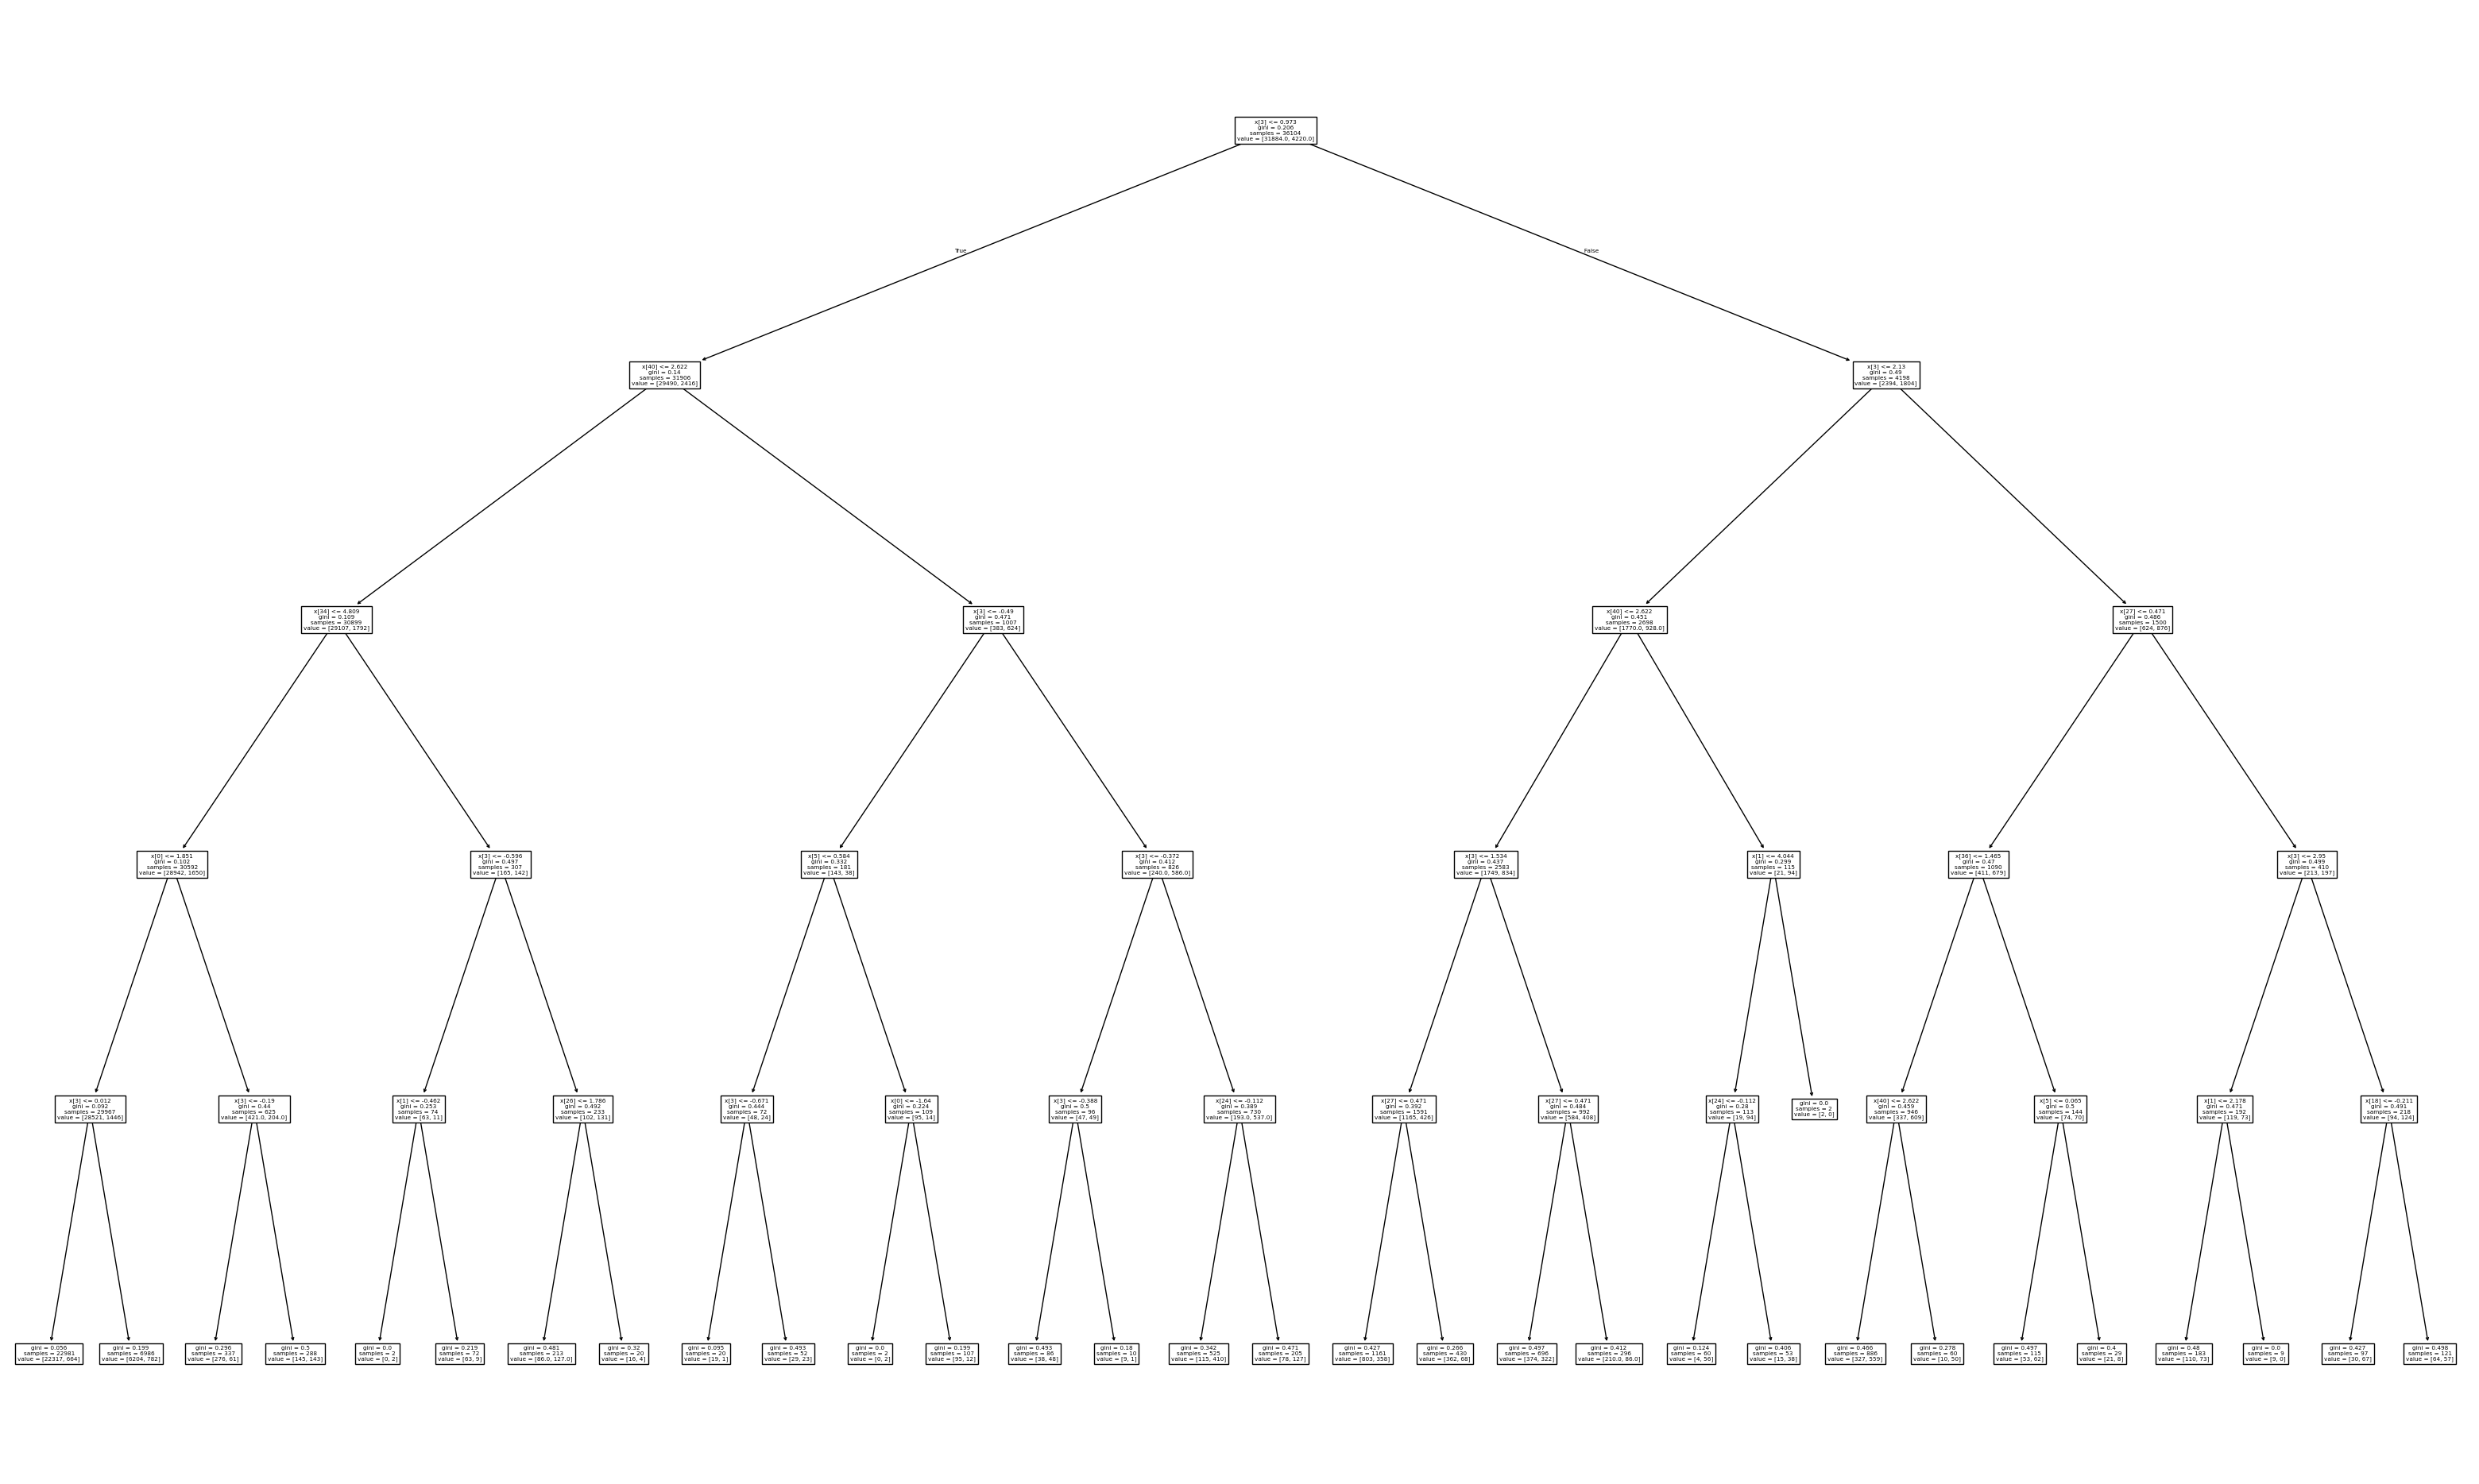

In [50]:
plt.figure(figsize=(40,24))
from sklearn import tree
tree.plot_tree(tree_clf.fit(X_train, y_train)) 

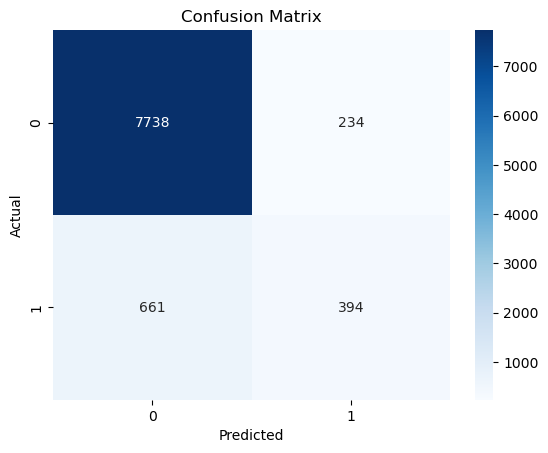

In [52]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted'); plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [58]:
# ROC Curves
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve, f1_score
fpr_log, tpr_log, _ = roc_curve(y_test, y_pred)
fpr_tree, tpr_tree, _ = roc_curve(y_test, y_prob_tree)
auc_log = roc_auc_score(y_test, y_pred)
auc_tree = roc_auc_score(y_test,y_prob_tree)

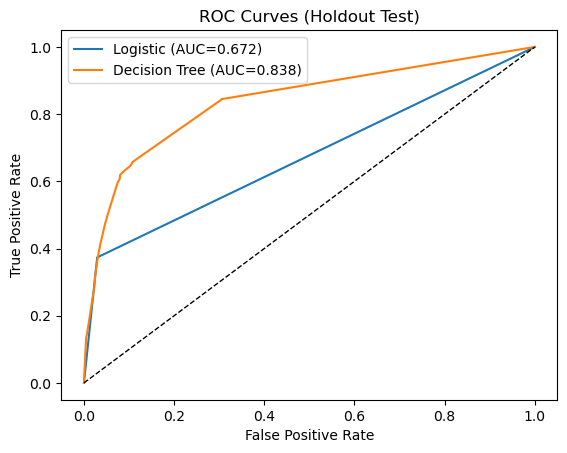

In [59]:
plt.figure()
plt.plot(fpr_log, tpr_log, label=f"Logistic (AUC={auc_log:.3f})")
plt.plot(fpr_tree, tpr_tree, label=f"Decision Tree (AUC={auc_tree:.3f})")
plt.plot([0,1], [0,1], 'k--', linewidth=1)   # ✅ fixed line — properly closed brackets
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves (Holdout Test)")
plt.legend()
plt.show()